# Mini Projeto Santander - DSA

In [1]:
# Biblioteca import para o projeto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head(2)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0


## Pré Processamento e Analise

In [4]:
df.shape

(76020, 371)

In [5]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
#Colunas
colunas = list(df.columns)

In [7]:
df.duplicated()
# Portanto nao temos valores duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
76015    False
76016    False
76017    False
76018    False
76019    False
Length: 76020, dtype: bool

In [8]:
def valor_missing(valor):
    if (valor.isnull == True):
        print("Temos valor nulo")

In [9]:
df.apply(valor_missing)
# Portanto nao temos valores missing

ID                         None
var3                       None
var15                      None
imp_ent_var16_ult1         None
imp_op_var39_comer_ult1    None
                           ... 
saldo_medio_var44_hace3    None
saldo_medio_var44_ult1     None
saldo_medio_var44_ult3     None
var38                      None
TARGET                     None
Length: 371, dtype: object

In [10]:
def limite_valor(coluna):
    print("Valor minimo: ", str(coluna.min()), "Valor maximo : ", str(coluna.max()), " da coluna : ", str(coluna.name))

In [11]:
# Alguns saldos possuem valores negativos na conta
# Algumas variaveis tem apenas 1 valor
# df.apply(limite_valor, axis=0)

In [12]:
#Temos um problema de desbalanceamento
df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

## Tratando Valores unicos nas variaveis

In [13]:
valores_unicos = []
for coluna in colunas:
    if df[coluna].nunique() < 2:
        del df[coluna]

In [14]:
df.shape

(76020, 337)

In [15]:
colunas = list(df.columns)

## Tratando DELTA

In [16]:
# Avaliando a variavel "delta" por apresentar valores extremos
df.iloc[:,175:201].describe()

,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,...,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3
count,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,...,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04
mean,2.630887e+05,2.630887e+05,4.867140e+07,5.130229e+06,1.315443e+05,9.208103e+06,4.998685e+06,2.630887e+06,1.315443e+05,5.261773e+05,...,1.315443e+05,9.208103e+06,4.998685e+06,2.630887e+06,1.315443e+05,5.261773e+05,5.261773e+05,6.577217e+05,1.315443e+05,5.524862e+06
std,5.129183e+07,5.129183e+07,6.959537e+08,2.264435e+08,3.626904e+07,3.033108e+08,2.235230e+08,1.621798e+08,3.626904e+07,7.253665e+07,...,3.626904e+07,3.033108e+08,2.235230e+08,1.621798e+08,3.626904e+07,7.253665e+07,7.253665e+07,8.109791e+07,3.626904e+07,2.349869e+08
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,...,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10


In [17]:
coluna_delta = list(df.iloc[:,175:201])
coluna_delta

['delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3']

In [18]:
for coluna in coluna_delta: 
    df[coluna] = pd.Series([1 if x == 9999999999 else x for x in df[coluna]])

In [19]:
df.iloc[:,175:201].describe()

,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,...,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,0.000026,0.000026,-0.016956,0.000321,-0.000272,0.000803,0.000500,0.000250,0.000013,0.000026,...,-0.000217,0.000855,0.000500,0.000250,0.000013,0.000026,0.000053,-0.000013,0.000013,0.000638
std,0.005129,0.005129,0.166389,0.028158,0.016936,0.045377,0.022352,0.016619,0.003627,0.008884,...,0.015493,0.041353,0.022352,0.016619,0.003627,0.008884,0.007254,0.012029,0.003627,0.037556
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,5.500000,1.500000,1.000000,6.267608,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


## Balanceamento dos dados

In [25]:
from sklearn.utils import resample

In [20]:
df.shape

(76020, 337)

In [21]:
# Separate majority and minority classes
df_majority = df[df.TARGET==0]
df_minority = df[df.TARGET==1]

In [24]:
df_majority.shape, df_minority.shape

((73012, 337), (3008, 337))

In [29]:
# Upsample Classe minoritaria
df_minority_upsampled = resample(df_minority, 
                                 replace=True, 
                                 n_samples=50000,   
                                 random_state=123) 
 
# Concatenando as classes
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Avaliar
df_upsampled.TARGET.value_counts()

0    73012
1    50000
Name: TARGET, dtype: int64

In [30]:
df_upsampled.shape

(123012, 337)

## Normalização dos dados

In [31]:
min_max_scaler = preprocessing.MinMaxScaler()

In [32]:
target = df_upsampled['TARGET']

In [33]:
x = df_upsampled.drop(['TARGET'], axis=1).values #returns a numpy array
df_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(df_scaled, columns=colunas[0:336])

In [34]:
df_scaled.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.000000,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545
1,0.000013,0.999764,0.29,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003
2,0.000020,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822
3,0.000046,0.999764,0.32,0.0,0.01513,0.009275,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671
4,0.000059,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091


## PCA

In [35]:
del df_upsampled['ID']

In [36]:
from sklearn.decomposition import PCA

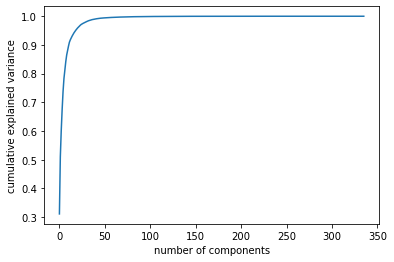

In [37]:
pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [38]:
pca = PCA(n_components=50)
df_pca = pca.fit_transform(df_scaled)

In [39]:
pd.DataFrame(df_pca).shape

(123012, 50)

# Machine Learning

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Divisão das variaveis de treino e teste

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, target, test_size=0.30, random_state=42)

In [42]:
X_train.shape, y_train.shape

((86108, 50), (86108,))

In [43]:
X_test.shape, y_test.shape

((36904, 50), (36904,))

### Algoritmo RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators = 200, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
# Prectitions com os valores de test
predictions = rfc.predict(X_test)

### Error

In [46]:
# Calulo do erro
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Acuracia:",metrics.accuracy_score(y_test, predictions))

Acuracia: 0.9833893344894863


In [47]:
pd.Series(predictions).value_counts()

0    21518
1    15386
dtype: int64

In [48]:
pd.Series(y_test).value_counts()

0    22131
1    14773
Name: TARGET, dtype: int64